In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn
from base_model import ModelHistory, ExtendedModelHistory

In [4]:
with open("./out_files/resnet50_LoRA_model_histories.pkl", "rb") as f:
    lora_histories = pickle.load(f)
with open("./out_files/resnet50_PostMult_LoRA_model_histories.pkl", "rb") as f:
    post_mult_lora_histories = pickle.load(f)
with open("./out_files/resnet50_Pre_Mult_LoRA_model_histories.pkl", "rb") as f:
    pre_mult_lora_histories = pickle.load(f)
with open("./out_files/resnet50_Shift_LoRA_model_histories.pkl", "rb") as f:
    shift_lora_histories = pickle.load(f)
with open("./out_files/resnet50_Shift_Pre_Mult_LoRA_model_histories.pkl", "rb") as f:
    shift_pre_mult_lora_histories = pickle.load(f)
with open("./out_files/resnet50_Shift_Post_Mult_LoRA_model_histories.pkl", "rb") as f:
    shift_post_mult_lora_histories = pickle.load(f)

In [5]:
ranks = [1, 2, 4, 8, 16, 32, 64]
lora_trainable_params = [lora_histories[rank].trainable_params for rank in ranks]
lora_test_accuracy = [lora_histories[rank].test_accuracy for rank in ranks]

post_mult_lora_trainable_params = [post_mult_lora_histories[rank].trainable_params for rank in ranks]
post_mult_lora_test_accuracy = [post_mult_lora_histories[rank].test_accuracy for rank in ranks]

pre_mult_lora_trainable_params = [pre_mult_lora_histories[rank].trainable_params for rank in ranks]
pre_mult_lora_test_accuracy = [pre_mult_lora_histories[rank].test_accuracy for rank in ranks]

shift_pre_mult_lora_trainable_params = [shift_pre_mult_lora_histories[rank].trainable_params for rank in ranks]
shift_pre_mult_lora_test_accuracy = [shift_pre_mult_lora_histories[rank].test_accuracy for rank in ranks]

shift_post_mult_lora_trainable_params = [shift_post_mult_lora_histories[rank].trainable_params for rank in ranks]
shift_post_mult_lora_test_accuracy = [shift_post_mult_lora_histories[rank].test_accuracy for rank in ranks]

shift_lora_trainable_params = [shift_lora_histories[rank].trainable_params for rank in ranks]
shift_lora_test_accuracy = [shift_lora_histories[rank].test_accuracy for rank in ranks]

In [6]:
with open("./out_files/resnet50_finetuned_model_history.pkl", "rb") as f:
    finetuned_history = pickle.load(f)

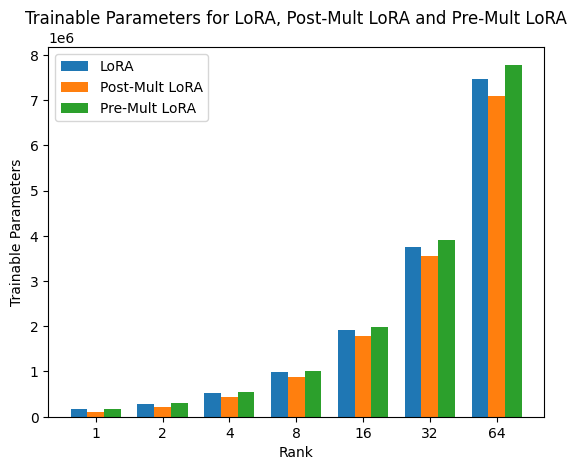

In [7]:
# plot trainable params for lora pre-mult and post-mult as bar plots for each rank
fig, ax = plt.subplots()
bar_width = 0.25
bar_positions = [i for i in range(len(ranks))]
ax.bar(bar_positions, lora_trainable_params, bar_width, label="LoRA")
ax.bar([pos + bar_width for pos in bar_positions], post_mult_lora_trainable_params, bar_width, label="Post-Mult LoRA")
ax.bar([pos + 2 * bar_width for pos in bar_positions], pre_mult_lora_trainable_params, bar_width, label="Pre-Mult LoRA")
ax.set_xticks([pos + bar_width for pos in bar_positions])
ax.set_xticklabels(ranks)
ax.set_xlabel("Rank")
ax.set_ylabel("Trainable Parameters")
ax.set_title("Trainable Parameters for LoRA, Post-Mult LoRA and Pre-Mult LoRA")
ax.legend()
plt.show()

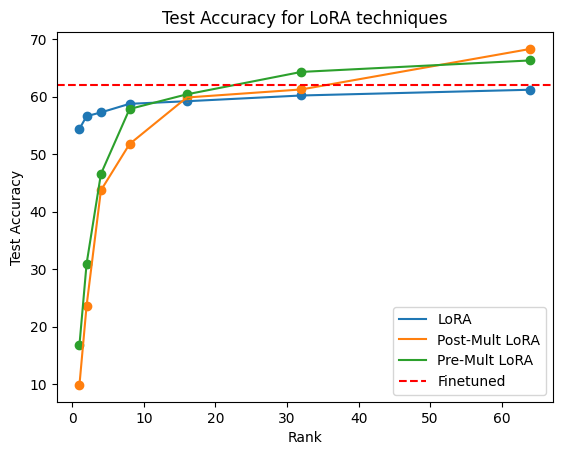

In [10]:
fig, ax = plt.subplots()

# Plot lines
ax.plot(ranks, lora_test_accuracy, label="LoRA")
ax.plot(ranks, post_mult_lora_test_accuracy, label="Post-Mult LoRA")
ax.plot(ranks, pre_mult_lora_test_accuracy, label="Pre-Mult LoRA")
# ax.plot(ranks, shift_lora_test_accuracy, label="Shift LoRA")
# ax.plot(ranks, shift_pre_mult_lora_test_accuracy, label="Shift Pre-Mult LoRA")
# ax.plot(ranks, shift_post_mult_lora_test_accuracy, label="Shift Post-Mult LoRA")

# Add scatter points to highlight each rank
ax.scatter(ranks, lora_test_accuracy, marker='o')
ax.scatter(ranks, post_mult_lora_test_accuracy, marker='o')
ax.scatter(ranks, pre_mult_lora_test_accuracy, marker='o')
# ax.scatter(ranks, shift_pre_mult_lora_test_accuracy, marker='o')
# ax.scatter(ranks, shift_post_mult_lora_test_accuracy, marker='o')
# ax.scatter(ranks, shift_lora_test_accuracy, marker='o')

# Add a horizontal line for finetuned test accuracy
ax.axhline(y=finetuned_history.test_accuracy, color='r', linestyle='--', label="Finetuned")

# Labels and title
ax.set_xlabel("Rank")
ax.set_ylabel("Test Accuracy")
ax.set_title("Test Accuracy for LoRA techniques")
ax.legend()

# Show the plot
plt.show()

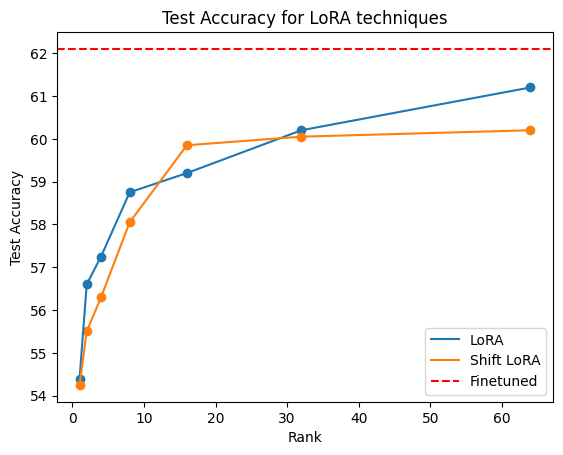

In [11]:
fig, ax = plt.subplots()

# Plot lines
ax.plot(ranks, lora_test_accuracy, label="LoRA")
# ax.plot(ranks, post_mult_lora_test_accuracy, label="Post-Mult LoRA")
# ax.plot(ranks, pre_mult_lora_test_accuracy, label="Pre-Mult LoRA")
ax.plot(ranks, shift_lora_test_accuracy, label="Shift LoRA")
# ax.plot(ranks, shift_pre_mult_lora_test_accuracy, label="Shift Pre-Mult LoRA")
# ax.plot(ranks, shift_post_mult_lora_test_accuracy, label="Shift Post-Mult LoRA")

# Add scatter points to highlight each rank
ax.scatter(ranks, lora_test_accuracy, marker='o')
# ax.scatter(ranks, post_mult_lora_test_accuracy, marker='o')
# ax.scatter(ranks, pre_mult_lora_test_accuracy, marker='o')
# ax.scatter(ranks, shift_pre_mult_lora_test_accuracy, marker='o')
# ax.scatter(ranks, shift_post_mult_lora_test_accuracy, marker='o')
ax.scatter(ranks, shift_lora_test_accuracy, marker='o')

# Add a horizontal line for finetuned test accuracy
ax.axhline(y=finetuned_history.test_accuracy, color='r', linestyle='--', label="Finetuned")

# Labels and title
ax.set_xlabel("Rank")
ax.set_ylabel("Test Accuracy")
ax.set_title("Test Accuracy for LoRA techniques")
ax.legend()

# Show the plot
plt.show()

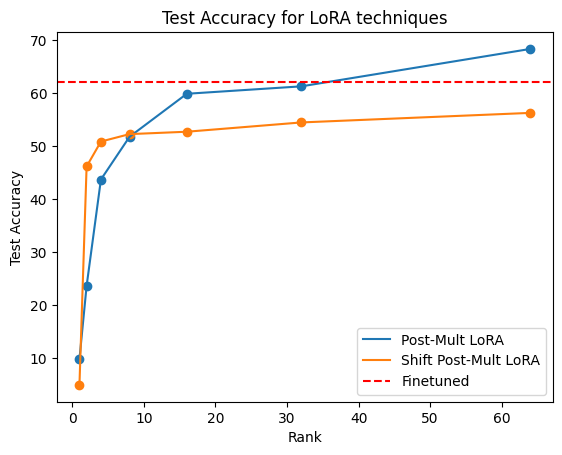

In [12]:
fig, ax = plt.subplots()

# Plot lines
# ax.plot(ranks, lora_test_accuracy, label="LoRA")
ax.plot(ranks, post_mult_lora_test_accuracy, label="Post-Mult LoRA")
# ax.plot(ranks, pre_mult_lora_test_accuracy, label="Pre-Mult LoRA")
# ax.plot(ranks, shift_lora_test_accuracy, label="Shift LoRA")
# ax.plot(ranks, shift_pre_mult_lora_test_accuracy, label="Shift Pre-Mult LoRA")
ax.plot(ranks, shift_post_mult_lora_test_accuracy, label="Shift Post-Mult LoRA")

# Add scatter points to highlight each rank
# ax.scatter(ranks, lora_test_accuracy, marker='o')
ax.scatter(ranks, post_mult_lora_test_accuracy, marker='o')
# ax.scatter(ranks, pre_mult_lora_test_accuracy, marker='o')
# ax.scatter(ranks, shift_pre_mult_lora_test_accuracy, marker='o')
ax.scatter(ranks, shift_post_mult_lora_test_accuracy, marker='o')
# ax.scatter(ranks, shift_lora_test_accuracy, marker='o')

# Add a horizontal line for finetuned test accuracy
ax.axhline(y=finetuned_history.test_accuracy, color='r', linestyle='--', label="Finetuned")

# Labels and title
ax.set_xlabel("Rank")
ax.set_ylabel("Test Accuracy")
ax.set_title("Test Accuracy for LoRA techniques")
ax.legend()

# Show the plot
plt.show()

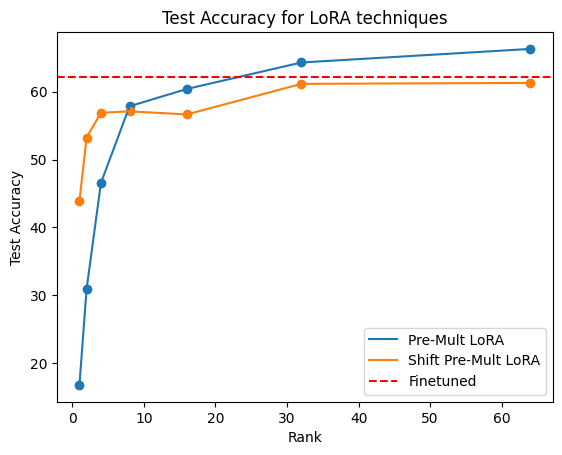

In [13]:
fig, ax = plt.subplots()

# Plot lines
# ax.plot(ranks, lora_test_accuracy, label="LoRA")
# ax.plot(ranks, post_mult_lora_test_accuracy, label="Post-Mult LoRA")
ax.plot(ranks, pre_mult_lora_test_accuracy, label="Pre-Mult LoRA")
# ax.plot(ranks, shift_lora_test_accuracy, label="Shift LoRA")
ax.plot(ranks, shift_pre_mult_lora_test_accuracy, label="Shift Pre-Mult LoRA")
# ax.plot(ranks, shift_post_mult_lora_test_accuracy, label="Shift Post-Mult LoRA")

# Add scatter points to highlight each rank
# ax.scatter(ranks, lora_test_accuracy, marker='o')
# ax.scatter(ranks, post_mult_lora_test_accuracy, marker='o')
ax.scatter(ranks, pre_mult_lora_test_accuracy, marker='o')
ax.scatter(ranks, shift_pre_mult_lora_test_accuracy, marker='o')
# ax.scatter(ranks, shift_post_mult_lora_test_accuracy, marker='o')
# ax.scatter(ranks, shift_lora_test_accuracy, marker='o')

# Add a horizontal line for finetuned test accuracy
ax.axhline(y=finetuned_history.test_accuracy, color='r', linestyle='--', label="Finetuned")

# Labels and title
ax.set_xlabel("Rank")
ax.set_ylabel("Test Accuracy")
ax.set_title("Test Accuracy for LoRA techniques")
ax.legend()

# Show the plot
plt.show()

In [12]:
pre_mult_lora_test_accuracy

[16.8, 30.95, 46.55, 57.85, 60.4, 64.3, 66.3]

In [14]:
post_mult_lora_test_accuracy

[9.85, 23.65, 43.7, 51.75, 59.85, 61.25, 68.3]

In [16]:
lora_test_accuracy

[54.4, 56.6, 57.25, 58.75, 59.2, 60.2, 61.2]